In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install konlpy
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf']

In [4]:
from konlpy.tag import Okt
from collections import Counter

In [5]:
noun_list=[]
for i in range(14):
    f = open(f'/content/drive/MyDrive/dataset/기호_{i+1} 공약.txt','r',encoding="utf-8")
    text = f.read()
    okt=Okt()
    noun = okt.nouns(text)
    count = Counter(noun)
    noun_list.append(count.most_common(80))

In [6]:
nominee_text=[]
for i in range(14):
    wc_dict = dict(noun_list[i])
    nominee_text.append(wc_dict)


In [7]:
nominee_word_list=[0]*14
print(nominee_word_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
nominee_word_list=[0]*14
nominee_word_dict=dict()
find_key = ["정치","행정","사법","법"]
for i in range(14):
    sum=0
    for key,value in nominee_text[i].items():
        if key in find_key:
            sum+=value
    nominee_word_list[i]=sum


In [9]:
import platform
from matplotlib import font_manager, rc # Runtime Configuration

# 맑은고딕 선택
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# Darwin은 맥북을 의미.
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches

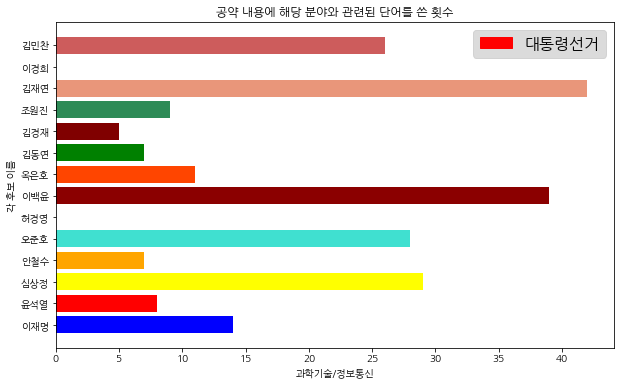

In [13]:
nominee_name=['이재명','윤석열','심상정','안철수','오준호','허경영'
              ,'이백윤','옥은호','김동연','김경재','조원진','김재연','이경희','김민찬']

n_data=len(nominee_name)
index=np.arange(n_data)
plt.figure(figsize=(10,6))
colors=['blue','red','yellow','orange','turquoise','magenta','darkred',
        'orangered','green','maroon','seagreen','darksalmon','darkblue','indianred']

plt.barh(index,nominee_word_list,tick_label=nominee_name,color=colors)
variable_x = patches.Patch(color='red',label='대통령선거')

plt.legend(handles=[variable_x],fontsize=16,facecolor="lightgrey")

plt.ylabel("각 후보 이름")
plt.xlabel("과학기술/정보통신")
plt.title("공약 내용에 해당 분야와 관련된 단어를 쓴 횟수")
plt.show()